In [1]:
#1. Get a dataset of all Zählstellen
import json
import pandas as pd
import requests
import numpy as np


In [2]:
#read the data from the web
response = requests.get("https://iot.hamburg.de/v1.1/Datastreams?$filter=properties/serviceName eq 'HH_STA_AutomatisierteVerkehrsmengenerfassung' and properties/layerName eq 'Anzahl_Kfz_Zaehlstelle_1-Tag'&$top=500")

In [3]:
#Turn the JSON response in usable data
#Extract the data from the the response object
betterdata=response.json()
#only select the data, which are under the heading "value" and convert this to a pandas dataframe
test = betterdata["value"]
df = pd.DataFrame.from_dict(test)
df.head()

,description,@iot.id,name,observationType,observedArea,phenomenonTime,properties,resultTime,@iot.selfLink,unitOfMeasurement,Thing@iot.navigationLink,Observations@iot.navigationLink,ObservedProperty@iot.navigationLink,Sensor@iot.navigationLink
0,Die Anzahl der von der Infrarotkamera erfasste...,15720,Kfz-Aufkommen an Verkehrszählstelle 0201982 im...,http://defs.opengis.net/elda-common/ogc-def/re...,"{'type': 'Point', 'coordinates': [9.991158, 53...",2021-07-26T22:00:00.000Z/2021-08-10T21:59:59.000Z,{'metadata': 'https://registry.gdi-de.org/id/d...,2021-07-28T01:46:26.885Z/2021-08-11T01:45:30.295Z,https://iot.hamburg.de/v1.1/Datastreams(15720),"{'name': 'Anzahl', 'symbol': None, 'definition...",https://iot.hamburg.de/v1.1/Datastreams(15720)...,https://iot.hamburg.de/v1.1/Datastreams(15720)...,https://iot.hamburg.de/v1.1/Datastreams(15720)...,https://iot.hamburg.de/v1.1/Datastreams(15720)...
1,Die Anzahl der von der Infrarotkamera erfasste...,15724,Kfz-Aufkommen an Verkehrszählstelle 201980 im ...,http://defs.opengis.net/elda-common/ogc-def/re...,"{'type': 'Point', 'coordinates': [9.99116, 53....",2021-07-26T22:00:00.000Z/2021-08-10T21:59:59.000Z,{'metadata': 'https://registry.gdi-de.org/id/d...,2021-07-28T01:46:26.959Z/2021-08-11T01:45:30.333Z,https://iot.hamburg.de/v1.1/Datastreams(15724),"{'name': 'Anzahl', 'symbol': None, 'definition...",https://iot.hamburg.de/v1.1/Datastreams(15724)...,https://iot.hamburg.de/v1.1/Datastreams(15724)...,https://iot.hamburg.de/v1.1/Datastreams(15724)...,https://iot.hamburg.de/v1.1/Datastreams(15724)...
2,Die Anzahl der von der Infrarotkamera erfasste...,15728,Kfz-Aufkommen an Verkehrszählstelle 0201981 im...,http://defs.opengis.net/elda-common/ogc-def/re...,"{'type': 'Point', 'coordinates': [9.991162, 53...",2021-07-26T22:00:00.000Z/2021-08-10T21:59:59.000Z,{'metadata': 'https://registry.gdi-de.org/id/d...,2021-07-28T01:46:31.373Z/2021-08-11T01:45:33.540Z,https://iot.hamburg.de/v1.1/Datastreams(15728),"{'name': 'Anzahl', 'symbol': None, 'definition...",https://iot.hamburg.de/v1.1/Datastreams(15728)...,https://iot.hamburg.de/v1.1/Datastreams(15728)...,https://iot.hamburg.de/v1.1/Datastreams(15728)...,https://iot.hamburg.de/v1.1/Datastreams(15728)...
3,Die Anzahl der von der Infrarotkamera erfasste...,15808,Kfz-Aufkommen an Verkehrszählstelle 0216931 im...,http://defs.opengis.net/elda-common/ogc-def/re...,NaN,NaN,{'metadata': 'https://registry.gdi-de.org/id/d...,None,https://iot.hamburg.de/v1.1/Datastreams(15808),"{'name': 'Anzahl', 'symbol': None, 'definition...",https://iot.hamburg.de/v1.1/Datastreams(15808)...,https://iot.hamburg.de/v1.1/Datastreams(15808)...,https://iot.hamburg.de/v1.1/Datastreams(15808)...,https://iot.hamburg.de/v1.1/Datastreams(15808)...
4,Die Anzahl der von der Infrarotkamera erfasste...,13008,Kfz-Aufkommen an Verkehrszählstelle 0244920 im...,http://defs.opengis.net/elda-common/ogc-def/re...,"{'type': 'Point', 'coordinates': [10.107262, 5...",2020-10-31T23:00:00.000Z/2021-08-10T21:59:59.000Z,{'metadata': 'https://registry.gdi-de.org/id/d...,2021-02-02T15:01:35.924Z/2021-08-11T01:17:03.705Z,https://iot.hamburg.de/v1.1/Datastreams(13008),"{'name': 'Anzahl', 'symbol': None, 'definition...",https://iot.hamburg.de/v1.1/Datastreams(13008)...,https://iot.hamburg.de/v1.1/Datastreams(13008)...,https://iot.hamburg.de/v1.1/Datastreams(13008)...,https://iot.hamburg.de/v1.1/Datastreams(13008)...


In [4]:
#2. Loop through the links of all "Zählstellen" to receive a dataset of the nr. of vehicles for every day/every "Zählstelle"

## generate links and append to df
df["links"] = df["Observations@iot.navigationLink"].apply(lambda x: x + "?$top=600")
df['id'] = df['@iot.id']

# clean dataframe where we dont find geo information
# 2 rows should be removed
print(f'Rows before NA removal: {len(df)}')
df = df.dropna()
print(f'Rows after NA removal: {len(df)}')
# extract the lat/long information to join later
df['long'] = df['observedArea'].apply(lambda x: x['coordinates'][0])
df['lat'] = df['observedArea'].apply(lambda x: x['coordinates'][1])

Rows before NA removal: 500
Rows after NA removal: 457


In [5]:
# create a list for the results
columns = ['@iot.id','phenomenonTime', 'result','resultTime']
missing_data = list()
df_complete = pd.DataFrame(columns = columns)

unique_links = df["links"].unique()

for link in unique_links:
    print(f'Retrieving data for {link}')
    response = requests.get(link)
    json = response.json()
    df_temp = pd.DataFrame.from_dict(json["value"])
    if set(columns).issubset(set(df_temp.columns)):
        df_temp = df_temp[columns]
        df_temp['id'] = link[40:45]
        df_complete = df_complete.append(df_temp,sort=False)
        df_complete['id'] = df_complete['id'].astype('int64')
    else:
        # no data available
        print(f'---- WARNING: No data available or wrong columns selected for {link}')
        missing_data.append(link)


Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(15720)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(15724)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(15728)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13008)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13616)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13400)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13600)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13596)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13636)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14568)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13840)/Observations?$top=600
Retrieving data for h

Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14236)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14008)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14300)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13716)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13252)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13388)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14240)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13608)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13848)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14388)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13868)/Observations?$top=600
Retrieving data for h

Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(12944)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13080)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13148)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13580)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(12936)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(12956)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14204)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13588)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13872)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14100)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14304)/Observations?$top=600
Retrieving data for h

Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14116)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(12912)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13092)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14112)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14192)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13556)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13144)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14172)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13140)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13088)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14456)/Observations?$top=600
Retrieving data for h

Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13220)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14596)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13672)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13668)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14784)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14284)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13060)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14280)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13056)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14604)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(14608)/Observations?$top=600
Retrieving data for h

In [6]:
missing_data

[]

In [7]:
len(df_complete)

119643

In [8]:
df_complete.head()

,@iot.id,phenomenonTime,result,resultTime,id
0,215424393,2021-08-04T22:00:00.000Z/2021-08-05T21:59:59.000Z,8020,2021-08-06T01:46:31.340Z,15720
1,215786447,2021-08-05T22:00:00.000Z/2021-08-06T21:59:59.000Z,7508,2021-08-07T01:45:46.628Z,15720
2,215927359,2021-08-06T22:00:00.000Z/2021-08-07T21:59:59.000Z,5215,2021-08-08T01:45:54.850Z,15720
3,216070505,2021-08-07T22:00:00.000Z/2021-08-08T21:59:59.000Z,3064,2021-08-09T01:44:53.021Z,15720
4,216256373,2021-08-08T22:00:00.000Z/2021-08-09T21:59:59.000Z,6913,2021-08-10T01:44:41.941Z,15720


In [9]:
df_raw = pd.merge(df_complete,df[['id','lat','long']], how='inner',on='id')
                        

In [10]:
df_raw.head()

,@iot.id,phenomenonTime,result,resultTime,id,lat,long
0,215424393,2021-08-04T22:00:00.000Z/2021-08-05T21:59:59.000Z,8020,2021-08-06T01:46:31.340Z,15720,53.665946,9.991158
1,215786447,2021-08-05T22:00:00.000Z/2021-08-06T21:59:59.000Z,7508,2021-08-07T01:45:46.628Z,15720,53.665946,9.991158
2,215927359,2021-08-06T22:00:00.000Z/2021-08-07T21:59:59.000Z,5215,2021-08-08T01:45:54.850Z,15720,53.665946,9.991158
3,216070505,2021-08-07T22:00:00.000Z/2021-08-08T21:59:59.000Z,3064,2021-08-09T01:44:53.021Z,15720,53.665946,9.991158
4,216256373,2021-08-08T22:00:00.000Z/2021-08-09T21:59:59.000Z,6913,2021-08-10T01:44:41.941Z,15720,53.665946,9.991158


In [11]:
df_raw.loc[df_raw['id']!=13600]

,@iot.id,phenomenonTime,result,resultTime,id,lat,long
0,215424393,2021-08-04T22:00:00.000Z/2021-08-05T21:59:59.000Z,8020,2021-08-06T01:46:31.340Z,15720,53.665946,9.991158
1,215786447,2021-08-05T22:00:00.000Z/2021-08-06T21:59:59.000Z,7508,2021-08-07T01:45:46.628Z,15720,53.665946,9.991158
2,215927359,2021-08-06T22:00:00.000Z/2021-08-07T21:59:59.000Z,5215,2021-08-08T01:45:54.850Z,15720,53.665946,9.991158
3,216070505,2021-08-07T22:00:00.000Z/2021-08-08T21:59:59.000Z,3064,2021-08-09T01:44:53.021Z,15720,53.665946,9.991158
4,216256373,2021-08-08T22:00:00.000Z/2021-08-09T21:59:59.000Z,6913,2021-08-10T01:44:41.941Z,15720,53.665946,9.991158
...,...,...,...,...,...,...,...
119638,207515266,2021-07-30T22:00:00.000Z/2021-07-31T21:59:59.000Z,1986,2021-08-01T01:17:00.332Z,13004,53.556524,10.001913
119639,208609366,2021-07-31T22:00:00.000Z/2021-08-01T21:59:59.000Z,1149,2021-08-02T01:16:56.907Z,13004,53.556524,10.001913
119640,210227618,2021-08-01T22:00:00.000Z/2021-08-02T21:59:59.000Z,2237,2021-08-03T01:16:57.208Z,13004,53.556524,10.001913
119641,211940532,2021-08-02T22:00:00.000Z/2021-08-03T21:59:59.000Z,2322,2021-08-04T01:17:04.357Z,13004,53.556524,10.001913


## Debug section

In [12]:
# only for debugging
columns_test = ['@iot.id','phenomenonTime', 'result','resultTime']
missing_data_test = list()
df_complete_test = pd.DataFrame(columns = columns_test)

# first link doesnt return data, second one works
unique_links_test = ['https://iot.hamburg.de/v1.1/Datastreams(13196)/Observations?$top=600',
                     'https://iot.hamburg.de/v1.1/Datastreams(13596)/Observations?$top=600']

for link in unique_links_test:
    print(f'Retrieving data for {link}')
    response = requests.get(link)
    json = response.json()
    df_temp_test = pd.DataFrame.from_dict(json["value"])
    if set(columns_test).issubset(set(df_temp_test.columns)):
        df_temp_test = df_temp_test[columns_test]
        df_temp_test['id'] = link[40:45]
        df_complete_test = df_complete_test.append(df_temp_test,sort=False)
        df_complete_test['id'] = df_temp_test['id'].astype('int64')
    else:
        # no data available
        print(f'---- WARNING: No data available or wrong columns selected for {link}')
        missing_data_test.append(link)


Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13196)/Observations?$top=600
---- WARNING: No data available or wrong columns selected for https://iot.hamburg.de/v1.1/Datastreams(13196)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13596)/Observations?$top=600


In [13]:
df_raw_test = pd.merge(df_complete_test,df[['id','lat','long']], how='inner',on='id')
                        

In [14]:
df_raw_test

,@iot.id,phenomenonTime,result,resultTime,id,lat,long
0,51218837,2021-01-21T23:00:00.000Z/2021-01-22T22:59:59.000Z,11444.0,2021-03-15T20:26:03.599Z,13596,53.579579,10.057484
1,51493103,2021-01-22T23:00:00.000Z/2021-01-23T22:59:59.000Z,9611.0,2021-03-15T20:47:20.954Z,13596,53.579579,10.057484
2,51730741,2021-01-23T23:00:00.000Z/2021-01-24T22:59:59.000Z,6940.0,2021-03-15T21:07:40.572Z,13596,53.579579,10.057484
3,51836604,2020-10-31T23:00:00.000Z/2020-11-01T22:59:59.000Z,11225.0,2021-03-15T13:09:26.108Z,13596,53.579579,10.057484
4,51836487,2020-11-30T23:00:00.000Z/2020-12-01T22:59:59.000Z,18010.0,2021-03-15T13:09:53.581Z,13596,53.579579,10.057484
...,...,...,...,...,...,...,...
123,152467732,2021-06-17T22:00:00.000Z/2021-06-18T21:59:59.000Z,13858.0,2021-06-19T01:24:36.318Z,13596,53.579579,10.057484
124,154042210,2021-06-18T22:00:00.000Z/2021-06-19T21:59:59.000Z,10788.0,2021-06-20T01:24:37.147Z,13596,53.579579,10.057484
125,155510409,2021-06-19T22:00:00.000Z/2021-06-20T21:59:59.000Z,466.0,2021-06-21T01:24:28.328Z,13596,53.579579,10.057484
126,160875346,2021-06-24T22:00:00.000Z/2021-06-25T21:59:59.000Z,1828.0,2021-06-26T01:24:42.911Z,13596,53.579579,10.057484


Visualisierung - Patricia
1. Wochentage rausfinden und Durchschnitt über Wochentage legen

In [15]:
weekday_list=[]

for i in df_raw['phenomenonTime']:
    t = i[25:35]
    day = pd.Timestamp(t)
    weekday = day.day_name()
    print(weekday)

weekday_list.append(weekday)



Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Sunday
Friday
Tuesday
Monday
Wednesday
Wednesday
Sunday
Friday
Monday
Wednesday
Tuesday
Saturday
Friday
Sunday
Monday
Tuesday
Wednesday
Sunday
Tuesday
Saturday
Saturday
Monday
Sunday
Tuesday
Friday
Monday
Saturday
Monday
Friday
Monday
Thursday
Wednesday
Sunday
Sunday
Tuesday
Saturday
Tuesday
Wednesday
Thursday
Sunday
Friday
Monday
Thursday
Saturday
Thursday
Sunday
Friday
Saturday
Thursday
Thursday
Saturday
Friday
Sunday
Friday
Tuesday
Monday
Wednesday
Wednesday
Thursday
Friday
Saturday
Monday
Tuesday
Thursday
Saturday
Monday
Tuesday
Wednesday
Friday
Saturday
Monday
Tuesday
Friday
Saturday
Sunday
Monday
Thursday
Friday
Saturday

Friday
Thursday
Saturday
Tuesday
Friday
Sunday
Wednesday
Wednesday
Saturday
Thursday
Monday
Sunday
Tuesday
Friday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Saturday
Friday
Sunday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Saturday
Sunday
Tuesday
Thursday
Friday
Saturday
Monday
Tuesday
Friday
Saturday
Monday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Sunday
Friday
Wednesday
Friday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Sunday
Wednesday
Tuesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Friday
Monday
Wednesday
Sunday
Wednesday
Thursday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Frida

Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Saturday
Friday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Tuesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Monday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesda

Saturday
Monday
Thursday
Sunday
Tuesday
Friday
Monday
Wednesday
Saturday
Saturday
Sunday
Tuesday
Thursday
Sunday
Wednesday
Friday
Thursday
Friday
Tuesday
Saturday
Wednesday
Tuesday
Monday
Thursday
Sunday
Friday
Saturday
Monday
Wednesday
Tuesday
Thursday
Sunday
Wednesday
Monday
Friday
Thursday
Saturday
Sunday
Thursday
Tuesday
Friday
Wednesday
Saturday
Monday
Sunday
Tuesday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Sunday
Monday
Sunday
Tuesday
Monday
Thursday
Wednesday
Tuesday
Wednesday
Saturday
Sunday
Monday
Wednesday
Thursday
Saturday
Sunday
Monday
Tuesday
Wednesday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Wednesday
Saturday
Wednesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Tuesday
Saturday


Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Friday
Sunday
Tuesday
Monday
Saturday
Wednesday
Wednesday
Thursday
Tuesday
Sunday
Wednesday
Saturday
Tuesday
Thursday
Sunday
Friday
Monday
Tuesday
Wednesday
Thursday
Saturday
Sunday
Monday
Monday
Friday
Monday
Saturday
Thursday

Thursday
Wednesday
Friday
Thursday
Saturday
Friday
Sunday
Saturday
Monday
Sunday
Tuesday
Monday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Sunday
Tuesday
Saturday
Monday
Friday
Saturday
Sunday
Saturday
Sunday
Friday
Wednesday
Thursday
Sunday
Tuesday
Friday
Wednesday
Monday
Saturday
Thursday
Tuesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Tuesday
Monday
Monday
Friday
Sunday
Wednesday
Saturday
Tuesday
Thursday
Friday
Sunday
Monday
Saturday
Wednesday
Tuesday
Thursday
Sunday
Monday
Wednesday
Friday
Thursday
Saturday
Tuesday
Friday
Wednesday
Sunday
Monday
Saturday
Thursday
Sunday
Friday
Tuesday
Saturday
Monday
Wednesday
Tuesday
Thursday
Thursday
Wednesday
Friday
Monday
Saturday
Tuesday
Friday
Sunday
Wednesday
Saturday
Monday
Thursday
Sunday
Tuesday
Monday
Wednesday
Tuesday
Wednesday
Saturday
Thursday
Friday
Thursday
Saturday
Friday
Monday
Sunday
Sunday
Monday
Tuesday
Wednesday
Thursday
Sunday
Tuesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednes

Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Saturday
Monday
Sunday
Tuesday
Friday
Wednesday
Saturday
Sunday
Tuesday
Thursday
Tuesday
Wednesday
Friday
Thursday
Saturday
Tuesday
Monday
Friday
Wednesday
Monday
Sunday
Saturday
Saturday
Sunday
Tuesday
Monday
Friday
Monday
Saturday
Wednesday
Tuesday
Thursday
Wednesday
Sunday
Friday
Friday
Thursday
Sunday
Friday
Tuesday
Monday
Wednesday
Tuesday
Sunday
Thursday
Friday
Wednesday
Monday
Saturday
Tuesday
Friday
Sunday
Wednesday
Monday
Thursday
Friday
Tuesday
Sunday
Wednesday
Monday
Wednesday
Tuesday
Sunday
Monday
Friday
Thursday
Saturday
Friday
Wednesday
Sunday
Monday
Thursday
Friday
Monday
Saturday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Thursday
Sunday
Monday
Tuesday
Friday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursd

Sunday
Monday
Tuesday
Monday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Saturday
Thursday
Sunday
Monday
Friday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Tuesday
Wednesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday

Friday
Wednesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Monday
Friday
Friday
Thursday
Sunday
Saturday
Monday
Tuesday
Monday
Wednesday
Saturday
Tuesday
Thursday
Sunday
Friday
Wednesday
Thursday
Saturday
Tuesday
Sunday
Saturday
Monday
Thursday
Sunday
Tuesday
Friday
Wednesday
Saturday
Tuesday
Thursday
Sunday
Wednesday
Monday
Friday
Thursday
Saturday
Tuesday
Friday
Sunday
Wednesday
Saturday
Thursday
Monday
Sunday
Tuesday
Monday
Wednesday
Thursday
Wednesday
Friday
Monday
Thursday
Saturday
Friday
Sunday
Saturday
Monday
Sunday
Tuesday
Wednesday
Monday
Thursday
Tuesday
Wednesday
Thursday
Friday
Sunday
Tuesday
Thursday
Friday
Saturday
Sunday
Tuesday
Wednesday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Wednesday
Monday
Tuesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunda

Monday
Tuesday
Monday
Wednesday
Tuesday
Friday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Wednesday
Friday
Saturday
Wednesday
Thursday
Friday
Saturday
Sunday
Wednesday
Thursday
Friday
Saturday
Monday
Wednesday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Thursday
Friday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Monday
Tuesday
Friday
Sunday
Saturday
Wednesday
Sunday


Tuesday
Thursday
Friday
Sunday
Monday
Friday
Monday
Friday
Friday
Sunday
Wednesday
Saturday
Sunday
Tuesday
Wednesday
Monday
Saturday
Tuesday
Sunday
Thursday
Wednesday
Friday
Monday
Saturday
Thursday
Friday
Wednesday
Thursday
Friday
Tuesday
Wednesday
Monday
Saturday
Tuesday
Sunday
Thursday
Wednesday
Friday
Sunday
Tuesday
Monday
Friday
Wednesday
Thursday
Sunday
Friday
Tuesday
Monday
Tuesday
Wednesday
Thursday
Monday
Saturday
Friday
Thursday
Wednesday
Sunday
Wednesday
Saturday
Monday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Thursday
Tuesday
Sunday
Saturday
Monday
Saturday
Monday
Thursday
Saturday
Wednesday
Friday
Saturday
Monday
Tuesday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunda

Saturday
Friday
Thursday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Friday
Saturday
Sunday
Saturday
Tuesday
Friday
Sunday
Wednesday
Tuesday
Monday
Thursday
Tuesday
Sunday
Monday
Thursday
Saturday
Friday
Wednesday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Wednesday
Friday
Monday
Thursday
Sunday
Tuesday
Friday
Friday
Wednesday
Saturday
Tuesday
Thursday
Sunday
Wednesday
Monday
Friday
Wednesday
Thursday
Saturday
Tuesday
Sunday
Saturday
Monday
Thursday
Sunday
Friday
Tuesday
Monday
Saturday
Tuesday
Sunday
Thursday
Wednesday
Friday
Monday
Thursday
Tuesday
Saturday
Saturday
Friday
Sunday
Wednesday
Monday
Thursday
Sunday
Monday
Tuesday
Tuesday
Wednesday
Friday
Thursday
Wednesday
Thursday
Saturday
Friday
Sunday
Wednesday
Saturday
Sunday

Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Friday
Tuesday
Saturday
Monday
Wednesday
Tuesday
Sunday
Thursday
Wednesday
Monday
Friday
Tuesday
Thursday
Saturday
Friday
Wednesday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Monday
Tuesday
Sunday
Saturda

Thursday
Monday
Sunday
Monday
Tuesday
Wednesday
Tuesday
Wednesday
Thursday
Saturday
Friday
Thursday
Friday
Sunday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Sunday
Tuesday
Thursday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Friday
Wednesday
Monday
Friday
Saturday
Monday
Wednesday
Saturday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Saturday
Sunday
Saturday
Friday
Tuesday
Wednesday
Monday
Sunday
Sunday
Tuesday
Th

Tuesday
Sunday
Tuesday
Friday
Saturday
Thursday
Friday
Sunday
Wednesday
Thursday
Sunday
Monday
Friday
Tuesday
Sunday
Monday
Wednesday
Monday
Wednesday
Friday
Saturday
Sunday
Wednesday
Monday
Saturday
Monday
Sunday
Wednesday
Friday
Thursday
Friday
Wednesday
Sunday
Thursday
Friday
Tuesday
Monday
Wednesday
Sunday
Wednesday
Friday
Monday
Thursday
Saturday
Tuesday
Friday
Sunday
Wednesday
Saturday
Monday
Sunday
Tuesday
Monday
Wednesday
Thursday
Monday
Friday
Saturday
Tuesday
Saturday
Monday
Tuesday
Wednesday
Saturday
Thursday
Thursday
Friday
Sunday
Tuesday
Wednesday
Friday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Thursday
Tuesday
Tuesday
Thursday
Saturday
Tuesday
Sunday
Tuesday
Monday
Saturday
Saturday
Thursday
Thursday
Friday
Wednesday
Tuesday
Thursday
Sunday
Friday
Sunday
Friday
Monday
Monday
Tuesday
Thursday
Friday
Sunday
M

Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Saturday
Tuesday
Friday
Saturday
Wednesday
Sunday
Monday
Thursday
Saturday
Monday
Wednesday
Saturday
Sunday
Monday
Thursday
Friday
Sunday
Tuesday
Friday
Tuesday
Wednesday
Sunday
Wednesday
Sunday
Monday
Saturday
Tuesday
Friday
Wednesday
Monday
Saturday
Friday
Thursday
Sunday
Wednesday
Monday
Thursday
Saturday
Friday
Thursday
Saturday
Monday
Sunday
Friday
Tuesday
Monday
Wednesday
Tuesday
Thursday
Sunday
Wednesday
Monday
Friday
Thursday
Saturday
Tuesday
Friday
Sunday
Wednesday

Tuesday
Wednesday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Saturday
Friday
Thursday
Saturday
Sunday
Monday
Tuesday
Monday
Sunday
Wednesday
Thursday
Thursday
Thursday
Friday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Wednesday
Friday
Friday
Thursday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thu

Sunday
Sunday
Friday
Tuesday
Saturday
Wednesday
Tuesday
Monday
Friday
Thursday
Saturday
Monday
Tuesday
Thursday
Saturday
Sunday
Monday
Tuesday
Sunday
Wednesday
Friday
Sunday
Wednesday
Monday
Saturday
Friday
Sunday
Tuesday
Monday
Monday
Friday
Wednesday
Saturday
Tuesday
Thursday
Sunday
Wednesday
Thursday
Saturday
Thursday
Sunday
Monday
Tuesday
Friday
Wednesday
Tuesday
Sunday
Wednesday
Monday
Friday
Sunday
Saturday
Tuesday
Friday
Wednesday
Monday
Thursday
Sunday
Tuesday
Monday
Tuesday
Wednesday
Thursday
Wednesday
Friday
Thursday
Saturday
Sunday
Saturday
Sunday
Monday
Thursday
Tuesday
Wednesday
Thursday
Friday
Sunday
Monday
Tuesday
Wednesday
Sunday
Tuesday
Wednesday
Saturday
Sunday
Wednesday
Thursday
Friday
Saturday
Monday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Thursday
Tuesday
Friday
Sunday
Wednesday
Saturday
Monday
Saturday
Thursday
Thursday
Saturday
Friday
Friday
Wednesday
Wednesday
Tuesday
Friday
Monday
Monday
Tuesda

Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Saturday
Sunday
Friday
Tuesday
Sunday
Wednesday
Saturday
Monday
Sunday
Thursday
Tuesday
Monday
Thursday
Saturday
Tuesday


Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Sunday
Thursday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Tuesday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Sunday
Tuesday
Wednesday
Thursday
Saturday
Thursday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesd

Sunday
Sunday
Monday
Monday
Tuesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Saturday
Sunday
Friday
Monday
Saturday
Wednesday
Sunday
Thursday
Tuesday
Wednesday
Friday
Monday
Tuesday
Thursday
Saturday
Friday
Saturday
Sunday
Monday
Friday
Sunday
Wednesday
Wednesday
Friday
Sa

Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Saturday
Sunday
Friday
Saturday
Tuesday
Saturday
Sunday
Monday
Wednesday
Monday
Tuesday
Friday
Wednesday
Saturday
Saturday
Monday
Friday
Thursday
Sunday
Wednesday
Thursday
Tuesday
Friday
Wednesday
Thursday
Sunday
Monday
Saturday
Tuesday
Wednesday
Sunday
Monday
Thursday
Friday
Tuesday
Wednesday
Monday
Friday
Tuesday
Thursday
Monday
Wednesday
Tuesday
Thursday
Thursday
Friday
Saturday
Monday
Friday
Sunday
Tuesday
Saturday
Sunday
Sunday
Tuesday
Wednesday
Thursday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Sunday
Thursday
Sunday
Monday
Saturday
Thursday
Saturday
Wednesd

Saturday
Tuesday
Friday
Sunday
Wednesday
Monday
Sunday
Tuesday
Monday
Tuesday
Wednesday
Thursday
Wednesday
Friday
Thursday
Saturday
Friday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Saturday
Sunday
Monday
Tuesday
Friday
Saturday
Sunday
Monday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Saturday
Saturday
Saturday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Friday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Th

Monday
Tuesday
Wednesday
Thursday
Monday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Sunday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Thursday
Friday
Saturday
Sunday
Monday
Sunday
Tuesday
Monday
Wednesday
Tuesday
Wednesday
Thursday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Wednesday
Thursday
Saturday
Wednesday
Sunday
Wednesday
Saturday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tues

Wednesday
Thursday
Tuesday
Wednesday
Thursday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Monday
Tuesday
Wednesday
Sunday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Wednesday
Wednesday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Thursday
Friday
Saturday
Monday
Sunday
Wednesday
Tuesday
Monday
Sunday
Monday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturda

Sunday
Friday
Wednesday
Friday
Saturday
Thursday
Monday
Sunday
Tuesday
Friday
Monday
Wednesday
Saturday
Tuesday
Monday
Sunday
Wednesday
Monday
Thursday
Friday
Tuesday
Saturday
Wednesday
Sunday
Saturday
Friday
Thursday
Sunday
Tuesday
Monday
Saturday
Wednesday
Tuesday
Thursday
Sunday
Thursday
Wednesday
Friday
Monday
Saturday
Tuesday
Friday
Wednesday
Sunday
Saturday
Thursday
Monday
Sunday
Tuesday
Monday
Wednesday
Tuesday
Thursday
Wednesday
Friday
Thursday
Saturday
Friday
Sunday
Saturday
Monday
Sunday
Tuesday
Monday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Sunday
Monday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Monday
Tuesday
Thursday
Friday
Saturday
Sunday
Thursday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
M

Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Friday
Tuesday
Saturday
Monday
Thursday
Tuesday
Sunday
Friday
Wednesday
Monday
Thursday
Saturday
Tuesday
Monday
Tuesday
Wednesday
Thursday
Friday
Sunday
Monday
Tuesday
Sunday
Wednesday
Friday
Monday
Sunday
Wednesday
Thursday
Saturday
Sunday
Monday
Friday
Tuesday
Monday
Friday
Wednesday
Saturday
Thursday
Sunday
Wednesday
Saturday
Thursday
Tuesday
Friday
Sunday
Wednesday
Saturday
Wednesday
Tuesday
Monday
Tuesday
Thursday
Sunday
Friday
Wednesday
Monday
Saturday
Thursday
Sunday
Saturday
Wednesday
Friday
Monday
Thursday
Tuesday
Friday
Wednesday


Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Wednesday
Friday
Tuesday
Sunday
Monday
Saturday
Thursday
Tuesday
Sunday
Tuesday
Wednesday
Friday
Monday
Thursday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Friday
Sunday
Wednesday
Saturday
Monday
Thursday
Sunday
Tuesday
Friday
Wednesday
Monday
Saturday
Tuesday
Thursday
Sunday
Wednesday
Friday
Monday
Thursday
Saturday
Tuesday
Friday
Wednesday
Sunday
Monday
Saturday
Thursday
Sunday
Tuesday
Friday
Monday
Wednesday
Saturday
Tuesday
Thursday
Sunday
Wednesday
Friday
Monday
Thursday
Saturday
Tuesday
Friday
Wednesday
Sunday
Saturday
Monday
T

Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Friday
Sunday
Wednesday
Monday
Saturday
Friday
Monday
Tuesday
Thursday
Wednesday
Tuesday
Thursday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Friday
Tuesday
Monday
Sunday
Sunday
Sunday
Wednesday
Saturday
Thursday
Sunday
Friday
Tuesday
Friday
Monday
Saturday
Wednesday
Tuesday
Thursday
Monday
Wednesday
Monday
Thursday
Tuesday
Saturday
Friday
Wednesday

Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Tuesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Sunday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Thursday
Monday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Saturday
Friday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesd

Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Saturday
Friday
Sunday
Tuesday
Wednesday
Saturday
Thursday
Sunday
Tuesday
Monday
Wednesday
Friday
Tuesday
Saturday
Monday
Wednesday
Friday
Sunday
Monday
Monday
Thursday
Friday
Sunday
Wednesday
Sunday
Friday
Monday
Wednesday
Tuesday
Thursday
Sunday
Wednesday
Monday
Friday
Saturday
Thursday
Thursday
Sunday
Tuesday
Monday
Friday
Saturday
Tuesday
Thursday
Sunday
Monday
Friday
Thursday
Tuesday
Friday
Wednesday
Sunday
Saturday
Monday
Thursday
Friday
Tuesday
Monday
Friday
Tuesday
Thursday
Sunday
Wednesday
Thursd

Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Friday
Saturday
Sunday
Friday
Tuesday
Sunday
Monday
Saturday
Wednesday
Sunday
Thursday
Tuesday
Friday
Monday
Wednesday
Thursday
Tuesday
Saturday
Wednesday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Friday
Monday
Saturday
Friday
Saturday
Thursday
Sunday
Tuesday
Monday
Saturday
Wednesday
S

Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Sunday
Tuesday
Wednesday
Saturday
Monday
Sunday
Thursday
Tuesday
Monday
Friday
Wednesday
Saturday
Thursday
Tuesday
Friday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Friday
Tuesday
Saturday
Wednesday
Sunday
Friday
Saturday
Monday
Thursday
Sunday
Tuesday
Monday
Friday
Monday
Wednesday
Saturday
Sunday
Thursday
Wednesday
Thursday
Wednesday
Tuesday
Friday
Sunday
Saturd

Wednesday
Friday
Thursday
Saturday
Sunday
Monday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Monday
Wednesday
Friday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Monday
Tuesday
Thursday
Tuesday
Wednesday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
We

Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Sunday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Saturday
Monday
Wednesday
Thursday
Friday
Thursday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Satu

Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Sunday
Saturday
Tuesday
Friday
Mon

Monday
Sunday
Wednesday
Friday
Monday
Saturday
Tuesday
Thursday
Sunday
Wednesday
Thursday
Monday
Friday
Saturday
Tuesday
Friday
Wednesday
Sunday
Saturday
Thursday
Monday
Sunday
Friday
Tuesday
Monday
Wednesday
Tuesday
Thursday
Wednesday
Friday
Thursday
Saturday
Friday
Sunday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Sunday
Wednesday
Thursday
Saturday
Sunday
Monday
Wednesday
Thursday
Friday
Saturday
Sunday
Saturday
Tuesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Friday
Thursday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Monday
Tuesday
Friday
Tuesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Saturday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesd

Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Friday
Tuesday
Sunday
Saturday
Monday
Wednesday
Thursday
Sunday
Tuesday
Wednesday
Tuesday
Friday
Monday
Thursday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Friday
Friday
Sunday
Saturday
Friday
Wednesday
Monday
Saturday
Thursday
Sunday
Tuesday
Wednesday
Monday
Saturday
Tuesday
Thursday
Sunday
Thursday
Wednesday
Monday
Wednesday
Tuesday
Friday
Wednesday
Sunday
Saturday
Monday
Tuesday
Thursday
Sunday
Tuesday
Monday
Friday
Saturday
Wednesday
Thursday
Sunday
Wednesday
Monday
Friday
Thursday
Tuesday
Saturday
Friday
Sunday
Wednesday
Saturday
Thursday
Monday
Sunday
Monday
Tuesday
Friday
Thursday
Tuesday
Thursday
Wednesday
Friday
Saturday
Sunday
Saturday
Monday
Sunday
Monday
Tuesday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday

Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Sunday
Tuesday
Friday
Wednesday
Saturday
Monday
Thursday
Tuesday
Sunday
Friday
Monday
Wednesday
Saturday
Tuesday
Thursday
Sunday
Friday
Wednesday
Thursday
Saturday
Sunday
Monday
Wednesday
Thursday
Monday
Sunday
Tuesday
Wednesday
Friday
Friday
Monday
Wednesday
Saturday
Monday
Tuesday
Thursday
Sunday
Wednesday
Wednesday
Tuesday
Thursday
Sunday
Friday
Monday
Wednesday
Sunday
Monday
Thursday
Sunday
Tuesday
Saturday
Friday
Wednesda

Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Friday
Thursday
Saturday
Sunday
Monday
Sunday
Tuesday
Monday
Wednesday
Wednesday
Thursday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Friday
Saturday
Wednesday
Saturday
Monday
Wednesday
Thursday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday

Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Sunday
Saturday
Tuesday
Friday
Sunday
Wednesday
Sunday
Wednesday
Friday
Monday
Tuesday
Saturday
Friday
Sunday
Thursday
Saturday
Sunday
Monday
Tuesday
Monday
Monday
Thursday
Wednesday
Wednesday
Friday
Saturday
Sunday
Tuesday
Friday
Wednesday
Saturday
Monday
Tuesday
Sunday
Friday
Thursday
Saturday
Wednesday
Thursday
Sunday
Friday
Tuesday
Wednesday
Monday
Tuesday
Sunday
Wednesday
Monday
Thursday
Saturday
Friday
Wednesday
Saturday
Thursday
Sunday
Monday
Saturday
Thursday
Wednesday
Friday
Thursday
Friday
Sunday
Wednesday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Friday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Monday
Thursday
Friday
Saturday
Sunday
Tuesday
Wednesday
Friday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Monday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday


Thursday
Saturday
Sunday
Tuesday
Friday
Monday
Wednesday
Tuesday
Thursday
Sunday
Wednesday
Friday
Monday
Thursday
Saturday
Tuesday
Friday
Wednesday
Sunday
Saturday
Monday
Thursday
Sunday
Tuesday
Monday
Wednesday
Tuesday
Thursday
Wednesday
Friday
Thursday
Saturday
Friday
Sunday
Saturday
Sunday
Monday
Monday
Tuesday
Wednesday
Thursday
Tuesday
Thursday
Sunday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Monday
Tuesday
Friday
Saturday
Sunday
Monday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Monday
Sunday
Wednesday
Tuesday
Monday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Wednesday
Friday
Saturday
Monday
Wednesday
Thursday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Fr

Sunday
Thursday
Tuesday
Monday
Wednesday
Friday
Saturday
Thursday
Tuesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Friday
Sunday
Friday
Wednesday
Wednesday
Saturday
Monday
Thursday
Sunday
Monday
Tuesday
Monday
Wednesday
Friday
Saturday
Tuesday
Monday
Sunday
Thursday
Wednesday
Thursday
Saturday
Tuesday
Friday
Sunday
Thursday
Saturday
Sunday
Friday
Tuesday
Monday
Wednesday
Saturday
Tuesday
Thursday
Wednesday
Friday
Monday
Thursday
Saturday
Tuesday
Tuesday
Friday
Wednesday
Sunday
Saturday
Monday
Thursday
Sunday
Saturday
Monday
Thursday
Tuesday
Sunday
Thursday
Wednesday
Friday
Saturday
Friday
Sunday
Sunday
Saturday
Monday
Tuesday
Monday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Sunday
Monday
Thursday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Monday
Tuesday
Friday
Saturday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Sunday
Wednesday
Monday
Tuesday
Wednesday
Saturday
Sunday
Monday
Wednesday
T

Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Saturday
Sunday
Monday
Sunday
Tuesday
Friday
Wednesday
Saturday
Wednesday
Tuesday
Sunday
Monday
Friday
Saturday
Tuesday
Thursday
Monday
Tuesday
Thursday
Saturday
Sunday
Monday
Thursday
Friday
Friday
Sunday
Wednesday
Saturday
Monday
Thursday
Sunday
Friday
Tuesday
Saturday
Monday
Wednesday
Tuesday
Thursday
Sunday
Wednesday
Monday
Friday
Monday
Sunday
Saturday
Thursday
Tuesday
Wednesday
Saturday


Monday
Tuesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Friday
Saturday
Sunday
Friday
Monday
Thursday
Tuesday
Saturday
Monday
Tuesday
Wednesday
Thursday
Saturday
Sunday
Monday
Monday
Sunday
Wednesday
Thursday
Saturday
Sunday
Friday
Friday
Monday
Mond

Wednesday
Saturday
Monday
Saturday
Sunday
Friday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Sunday
Wednesday
Tuesday
Thursday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Wednesday
Thursday
Sunday
Monday
Wednesday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thu

Sunday
Monday
Tuesday
Monday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Sunday
Monday
Tuesday
Thursday
Friday
Saturday
Sunday
Tuesday
Wednesday
Thursday
Friday
Sunday
Monday
Tuesday
Thursday
Sunday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Sunday
Wednesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Monday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Saturday
Wednesday
Monday
Saturday
Wednesday
Friday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursd

Saturday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Thursday
Tuesday
Friday
Sunday
Saturday
Monday
Thursday
Wednesday
Thursday
Saturday
Friday
Wednesday
Thursday
Wednesday
Friday
Thursday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Friday
Thursday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Wednesday
Monday
Tuesday
Friday
Sunday
Monday
Wednesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tue

Monday
Sunday
Tuesday
Monday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Monday
Tuesday
Wednesday
Thursday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Sunday
Wednesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Saturday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Saturday
Sunday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Friday
Sunday
Tuesday
Wednesday
Saturday
Monday
Sunday
Thursday
Tuesday
Monday
Wednesday
Friday
Thursday
Tuesday
Saturday
Sunday
Wednesday
Friday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sun

Thursday
Saturday
Friday
Sunday
Saturday
Wednesday
Monday
Sunday
Monday
Tuesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Monday
Tuesday
Wednesday
Thursday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Sunday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Sunday
Thursday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Sunday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Sunday
Friday
Saturday
Monday
Wednesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Saturday
Friday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thurs

Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Tuesday
Friday
Sunday
Sunday
Wednesday
Tuesday
Wednesday
Friday
Monday
Thursday
Tuesday
Saturday
Friday
Monday
Friday
Sunday
Monday
Monday
Wednesday
Friday
Saturday
Monday
Thursday
Sunday
Friday
Tuesday
Wednesday
Monday
Saturday
Tuesday
Monday
Sunday
Wednesday
Thursday
Saturday
Friday
Wednesday
Thursday
Sunday
Tuesday
Friday
Wednesday
Monday
Thursday
Sunday
Monday
Thursday
Friday
Sunday
Wednesday
Saturday
Thursday
Sunday
Monday
Wednesday
Tuesday
Sunday
Thursday
Wednesday
Friday
Saturday
Sunday
Wednesday
Saturday
Thursday
Sunday
Monday
Monday
Tuesday
Saturday
Wednesday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesd

Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Friday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Monday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Saturday
Sunday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Tuesday
Wednesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunda

Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Sunday
Friday
Tuesday
Tuesday
Saturday
Wednesday
Monday
Sunday
Monday
Wednesday
Thursday
Saturday


Saturday
Monday
Monday
Thursday
Sunday
Wednesday
Tuesday
Wednesday
Monday
Friday
Thursday
Saturday
Sunday
Wednesday
Saturday
Monday
Sunday
Friday
Monday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Monday
Tuesday
Thursday
Friday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Saturday
Thursday
Wednesday
Sunday
Sunday
Monday
Thursday
Tuesday
Wednesday
Saturday
Monday
Sunday
Tuesday
Saturday
Thursday
Wednesday
Friday
Thursday
Saturday
Tuesday
Friday
Tuesday
Thursday
Friday
Tuesday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Tuesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Sunday
Wednesday
Sunday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday

Wednesday
Saturday
Monday
Thursday
Friday
Monday
Tuesday
Friday
Wednesday
Tuesday
Thursday
Friday
Thursday
Saturday
Sunday
Wednesday
Friday
Monday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Wednesday
Thursday
Tuesday
Saturday
Monday
Saturday
Monday
Sunday
Wednesday
Sunday
Saturday
Monday
Thursday
Sunday
Tuesday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Sunday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Saturday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
T

Monday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Wednesday
Monday
Friday
Thursday
Tuesday
Thursday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Sunday
Saturday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thurs

Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Saturday
Sunday
Tuesday
Friday
Sunday
Monday
Saturday
Wednesday
Sunday
Tuesday
Thursday
Wednesday
Friday
Monday
Thursday
Tuesday
Saturday
Monday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Saturday
Sunday
Friday
Wednesday
Monday
Saturday
Thursday
Monday
Sunday
Tuesday
Friday
Monday
Wednesday
Saturday
Wednesday
Sunday
Tuesday
Thursday
Sunday
Wednesday
Friday
Thursday
Friday
Tuesday
Saturday
Monday
Thursday
Saturday
Sunday
Friday
Monday
Wednesday
Saturday
Tuesday
Thursday
Sunday
Wednesday
Friday
Monday
Thursday
Tuesday
Friday
Wednesday
Sunday
Saturday
Thursday
Monday
Sunday
Tuesday
Friday
Monday
Tuesday
Wednesday
Wednesday
Friday
Thursday
Friday
Saturday
Sunday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Saturday
Sunday
Monday
Tuesday
Wednesday

Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Saturday
Sunday
Monday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Thursday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Friday
Wednesday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Monday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesda

Thursday
Tuesday
Wednesday
Thursday
Friday
Friday
Saturday
Saturday
Sunday
Sunday
Monday
Tuesday
Monday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Monday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Wednesday
Thursday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Wednesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Sunday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Sunday
Wednesday
Tuesday
Friday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wedne

Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Friday
Sunday
Tuesday
Saturday
Wednesday
Monday
Tuesday
Sunday
Thursday
Friday
Monday
Wednesday
Tuesday
Thursday
Saturday
Wednesday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Friday
Saturday
Monday
Thursday
Sunday
Monday
Friday
Tuesday
Monday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Sunday
Thursday
Friday
Saturday
Tuesday
Wednesday
Saturday
Tuesday
Thursday
Monday
Sunday
Friday
Monday
Wednesday
Tuesday
Thursday
Sunday
Friday
Wednesday
Monday
Thursday
Saturday
Tuesday
Friday
Sunday
Wednesday
Saturday
Monday
Thursday
Sunday
Tuesday
Monday
Wednesday
Tuesday
Thursday
Wednesday
Thursday
Friday
Saturday
Friday
Sunday
Saturday
Sunday
Monday
Tuesday
Monday
Thursday
Wednesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Wednesday
Thursday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday


Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Sunday
Sunday
Tuesday
Friday
Saturday
Wednesday
Sunday
Thursday
Tuesday
Friday
Monday
Tuesday
Saturday
Monday
Tuesday
Sunday
Monday
Thursday
Monday
Wednesday
Friday
Sunday
Wednesday
Saturday
Sunday
Monday
Monday
Tuesday
Friday
Saturday
Tuesday
Thursday
Sunday
Wednesday
Friday
Monday
Friday
Thursday
Saturday
Wednesday
Saturday
Monday
Thursday
Sunday
Friday
Tuesday
Monday
Tuesday
Thursday
Sunday
Wednesday
Friday
Tuesday
Saturday
Friday
Sunday
Wednesday
Saturday
Monday
Thursday
Monday
Tuesday
Wednesday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Wednesday
Saturday
Sund

Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Saturday
Wednesday
Friday
Sunday
Tuesday
Saturday
Sunday
Wednesday
Monday
Friday
Tuesday
Sunday
Monday
Thursday
Friday
Saturday
Friday
Wednesday
Friday
Saturday
Monday
Sunday
Monday
Tuesday
Monday
Wednesday
Saturday
Tuesday
Saturday
Thursday
Sunday
Wednesday
Thursday
Wednesday
Thursday
Sunday
Friday
Tuesday
Monday
Wednesday
Thursday
Wednesday
Sunday
Monday
Tuesday
Thursday
Saturday
Wedn

Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Friday
Tuesday
Monday
Thursday
Saturday
Monday
Saturday
Tuesday
Friday
Saturday
Thursday
Tuesday
Monday
Sunday
Thursday
Saturday
Tuesday
Sunday
Sunday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Saturday
Thursday
Friday
Sunday
Monday
Tuesday
Monday
Tuesday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Tuesday
Saturday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Mon

Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Wednesday
Monday
Thursday
Tuesday
Sunday
Saturday
Saturday
Monday
Sunday
Wednesday
Monday
Thursday
Sunday
Tuesday
Wednesday
Monday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Sunday
Wednesday
Monday
Wednesday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Saturday
Monday
Wednesday
Saturday
Wednesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tu

Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Sunday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Monday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Friday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
M

Saturday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Sunday
Wednesday
Tuesday
Monday
Monday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Wednesday
Saturday
Monday
Tuesday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday

Saturday
Sunday
Monday
Wednesday
Thursday
Friday
Sunday
Monday
Wednesday
Thursday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Wednesday
Thursday
Tuesday
Friday
Sunday
Monday
Saturday
Saturday
Sunday
Monday
Thursday
Sunday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Sunday
Wednesday
Tuesday
Friday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Saturday
Friday
Tuesday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tu

Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Tuesday
Monday
Friday
Sunday
Saturday
Wednesday
Tuesday
Sunday
Monday
Friday
Wednesday
Tuesday
Thursday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Thursday
Friday
Sunday
Wednesday
Thursday
Monday
Saturday
Tuesday
Sunday
Friday
Monday
Wednesday
Saturday
Wednesday
Sunday
Sunday
Thursday
Wednesday
Monday
Friday
Thursday
Saturday
Tuesday
Friday
Saturday
Tuesday
Saturday
Monday
Thursday
Sunday
Friday
Monday
Wednesday
Tuesday
Sunday
Thursday
Wednesday
Friday
Monday
Thursday
Saturday
Tuesday
Sunday
Wednesday
Saturday
Monday
Tuesday
Thursday
Sunday
Monday
Wednesday
Tuesday
Wednesday
Thursday
Saturday
Friday
Thursday
Saturday
Friday
Sunday
Sunday
Wednesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Sunday
Monday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
M

Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Sunday
Tuesday
Wednesday
Monday
Saturday
Saturday
Sunday
Wednesday
Monday
Friday
Thursday
Tuesday
Friday
Monday
Tuesday
Thursday
Sunday
Monday
Friday
Tuesday
Tuesday
Sunday
Wednesday
Saturday
Monday
Thursday
Sunday
Tuesday
Friday
Monday
Saturday
Monday
Thursday
Sunday
Friday
Thursday
Friday
Saturday
Wednesday
Wednesday
Thursday
Sunday
Tuesday
Friday
Wednesday
Monday
Thursday
Sunday
Wednesday
Monday
Friday
Tuesday
Saturday
Friday
Wednes

Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Sunday
Friday
Saturday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Sunday
Tuesday
Friday
Wednesday
Monday
Sunday
Thursday
Wednesday
Monday
Friday
Thursday
Friday
Sunday
Tuesday
Friday
Sunday
Friday
Wednesday
Thursday
Sunday
Tuesday
Monday
Wednesday
Saturday
Wednesday
Sunday
Friday
Thursday
Saturday
Tuesday
Wednesday
Thursday
Sunday
Friday
Monday
Wednesday
Thursday
Friday
Monday
Tuesday
Sunday
Monday
Thursday
Saturday
Tuesday
Wedn

Saturday
Wednesday
Thursday
Monday
Tuesday
Sunday
Friday
Wednesday
Monday
Saturday
Monday
Tuesday
Sunday
Wednesday
Friday
Thursday
Saturday
Tuesday
Monday
Friday
Wednesday
Sunday
Saturday
Thursday
Sunday
Tuesday
Monday
Tuesday
Thursday
Wednesday
Friday
Thursday
Friday
Saturday
Sunday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Wednesday
Thursday
Friday
Saturday
Monday
Tuesday
Thursday
Friday
Saturday
Sunday
Thursday
Thursday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Monday
Sunday
Wednesday
Monday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Monday
Monday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wedne

Friday
Wednesday
Saturday
Monday
Thursday
Sunday
Tuesday
Monday
Wednesday
Tuesday
Thursday
Wednesday
Thursday
Saturday
Friday
Saturday
Sunday
Monday
Sunday
Friday
Tuesday
Wednesday
Monday
Thursday
Tuesday
Wednesday
Thursday
Friday
Sunday
Monday
Tuesday
Friday
Saturday
Sunday
Monday
Tuesday
Thursday
Friday
Sunday
Monday
Tuesday
Thursday
Friday
Monday
Tuesday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Sunday
Friday
Monday
Tuesday
Sunday
Monday
Saturday
Tuesday
Saturday
Sunday
Saturday
Friday
Tuesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Sunday
Wednesday
Wednesday
Thursday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Saturday
Wednesday
Thursday
Wednesday
Saturday
Wednesday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tue

Saturday
Monday
Thursday
Sunday
Tuesday
Friday
Saturday
Monday
Wednesday
Tuesday
Thursday
Sunday
Wednesday
Friday
Monday
Thursday
Saturday
Tuesday
Friday
Wednesday
Sunday
Saturday
Thursday
Monday
Sunday
Tuesday
Monday
Wednesday
Tuesday
Thursday
Wednesday
Thursday
Friday
Saturday
Saturday
Friday
Sunday
Sunday
Monday
Tuesday
Monday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Wednesday
Wednesday
Thursday
Wednesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday


Sunday
Monday
Tuesday
Monday
Sunday
Tuesday
Wednesday
Monday
Wednesday
Thursday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Friday
Sunday
Monday
Tuesday
Monday
Tuesday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesda

Thursday
Wednesday
Saturday
Monday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Sunday
Wednesday
Monday
Tuesday
Wednesday
Thursday
Friday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Saturday
Wednesday
Friday
Sunday
Monday
Wednesday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Sunday
Friday
Saturday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wedne

Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Friday
Tuesday
Wednesday
Saturday
Monday
Tuesday
Sunday
Thursday
Friday
Monday
Wednesday
Thursday
Saturday
Tuesday
Friday
Sunday
Wednesday
Monday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Sunday
Thursday
Friday
Monday
Saturday
Tuesday
Sunday
Monday
Friday
Wednesday
Saturday
Thursday
Tuesday
Sunday
Wednesday
Monday
Thursday
Wednesday
Saturday
Tuesday
Friday
Sunday
Saturday
Tuesday
Monday
Thursday
Sunday
Monday
Friday
Wednesday
Tuesday
Saturday
Sunday
Thursday
Thursday
Wednesday
Friday
Monday
Saturday
Tuesday
Friday
Saturday
Monday
Thursday
Monday
Tuesday
Wednesday
Tuesday
Saturday
Wednesday
Thursday
Friday
Wednesday
Friday
Sunday
Saturday
Monday
Sunday
Tuesday
Monday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Thursday

Friday
Monday
Monday
Wednesday
Friday
Thursday
Tuesday
Wednesday
Saturday
Sunday
Thursday
Sunday
Monday
Friday
Tuesday
Saturday
Wednesday
Monday
Thursday
Tuesday
Friday
Saturday
Wednesday
Sunday
Saturday
Thursday
Friday
Monday
Tuesday
Wednesday
Monday
Sunday
Thursday
Tuesday
Friday
Saturday
Wednesday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Tuesday
Thursday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Thursday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Sunday
Wednesday
Monday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Wednesday
Saturday
Friday
Saturday
Sunday
Wednesday
Thursday
Saturday
Monday
Tuesday
Wednes

Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Sunday
Sunday
Saturday
Tuesday
Sunday
Tuesday
Wednesday
Friday
Monday
Thursday
Friday
Saturday
Wed

Friday
Saturday
Monday
Wednesday
Thursday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Saturday
Friday
Thursday
Tuesday
Sunday
Saturday
Monday
Tuesday
Saturday
Monday
Sunday
Monday
Thursday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Sunday
Wednesday
Monday
Wednesday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Sunday
Tuesday
Saturday
Thursday
Monday
Friday
Saturday
Sunday
Tuesday
Friday
Sunday
Wednesday
Tuesday
Saturday
Monday
Wednesday
Thursday
Sunday
Wednesday
Friday
Monday
Tuesday
Thursday
Saturday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Friday
Monday
Wednesday
Saturday
Tuesday
Monday
Thursday
Sunday
Friday
Wednesday
Saturday
Tuesday
Thursda

Meistens kann man die apply Funktion für solche Fälle nutzen, also wenn man für jeden Wert oder jede Reihe etwas anwenden will.
Konkret im unteren Beispiel wird `apply(lambda x: get_weekday(x))` für jeden Wert in `df_raw['phenomenonTime']` angewendet und `return weekday`. Das kann dann einfach in eine neue Spalte gespeichert werden (siehe df['weekday'], dieser Key muss vorher nicht existieren)

In [16]:
# Dein Code nur als Funktion
def get_weekday(input_date):
    t = input_date[25:35]
    day = pd.Timestamp(t)
    weekday = day.day_name()
    return weekday

In [17]:
# lass das laufen und du siehst was der Output ist
# ich nutze df_raw_test, damit das etwas schneller ist
df_raw_test['phenomenonTime'].apply(lambda x: get_weekday(x))

0        Friday
1      Saturday
2        Sunday
3        Sunday
4       Tuesday
         ...   
123      Friday
124    Saturday
125      Sunday
126      Friday
127    Saturday
Name: phenomenonTime, Length: 128, dtype: object

In [18]:
# neue Spalte im Dataframe
df_raw['weekday'] = df_raw['phenomenonTime'].apply(lambda x: get_weekday(x))

In [19]:
df_raw.head()

,@iot.id,phenomenonTime,result,resultTime,id,lat,long,weekday
0,215424393,2021-08-04T22:00:00.000Z/2021-08-05T21:59:59.000Z,8020,2021-08-06T01:46:31.340Z,15720,53.665946,9.991158,Thursday
1,215786447,2021-08-05T22:00:00.000Z/2021-08-06T21:59:59.000Z,7508,2021-08-07T01:45:46.628Z,15720,53.665946,9.991158,Friday
2,215927359,2021-08-06T22:00:00.000Z/2021-08-07T21:59:59.000Z,5215,2021-08-08T01:45:54.850Z,15720,53.665946,9.991158,Saturday
3,216070505,2021-08-07T22:00:00.000Z/2021-08-08T21:59:59.000Z,3064,2021-08-09T01:44:53.021Z,15720,53.665946,9.991158,Sunday
4,216256373,2021-08-08T22:00:00.000Z/2021-08-09T21:59:59.000Z,6913,2021-08-10T01:44:41.941Z,15720,53.665946,9.991158,Monday


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

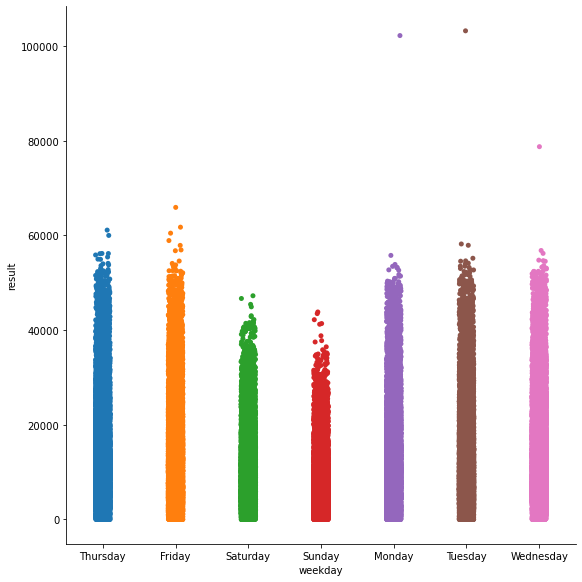

In [21]:
# Amount of cars per weekday
sns.catplot(x="weekday", y="result", data = df_raw, height=8)

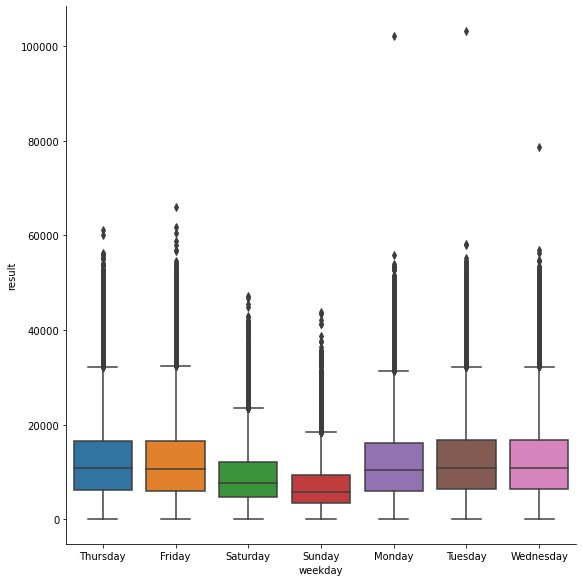

In [22]:
# Another way for visualiszation is using a boxplot. 
sns.catplot(x="weekday", y="result", kind="box", data=df_raw, height = 8)

In [23]:
# Calculating the average of each weekday
df_raw.groupby(['weekday']).mean()

,id,lat,long
weekday,,,
Friday,13884.074780,53.573301,10.007366
Monday,13883.770471,53.573408,10.007327
Saturday,13883.888702,53.573342,10.007360
Sunday,13883.509962,53.573354,10.007362
Thursday,13884.672476,53.573323,10.007108
Tuesday,13884.363003,53.573376,10.007204
Wednesday,13882.460936,53.573391,10.007275


In [24]:
df_raw.dtypes

@iot.id            object
phenomenonTime     object
result             object
resultTime         object
id                  int64
lat               float64
long              float64
weekday            object
dtype: object